In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
X = np.array([[1,2],[1.5,1.8],[5,8],[8,8],[1,0.6],[9,11]])


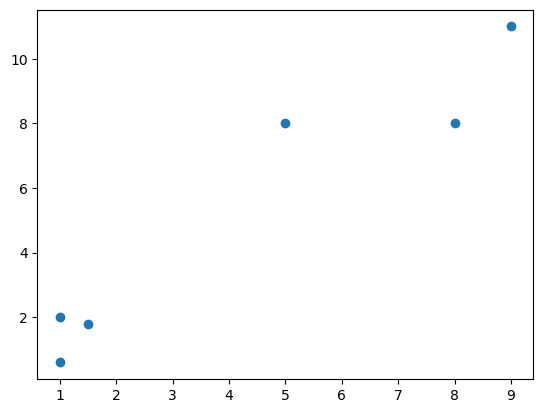

In [3]:
plt.scatter(X[:,0],X[:,1])
plt.show()

In [4]:
from sklearn.cluster import KMeans

In [5]:
k_means = KMeans(n_clusters=3)


In [6]:
k_means.fit(X)

KMeans(n_clusters=3)

In [7]:
k_means.labels_

array([0, 0, 1, 1, 0, 2])

In [8]:
k_means.cluster_centers_

array([[ 1.16666667,  1.46666667],
       [ 6.5       ,  8.        ],
       [ 9.        , 11.        ]])

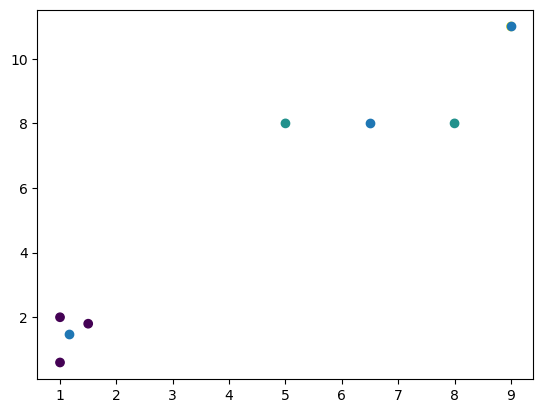

In [9]:
plt.scatter(X[:,0],X[:,1],c=k_means.labels_)
plt.scatter(k_means.cluster_centers_[:,0],k_means.cluster_centers_[:,1])
plt.show()

### KMeans on Iris Dataset

In [10]:
import numpy as np 
import pandas as pd 
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

In [11]:
import pandas as pd

In [12]:
df = pd.read_csv('Iris.csv')

In [13]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [14]:
np.unique(df['Species'])

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [16]:
df.shape

(150, 6)

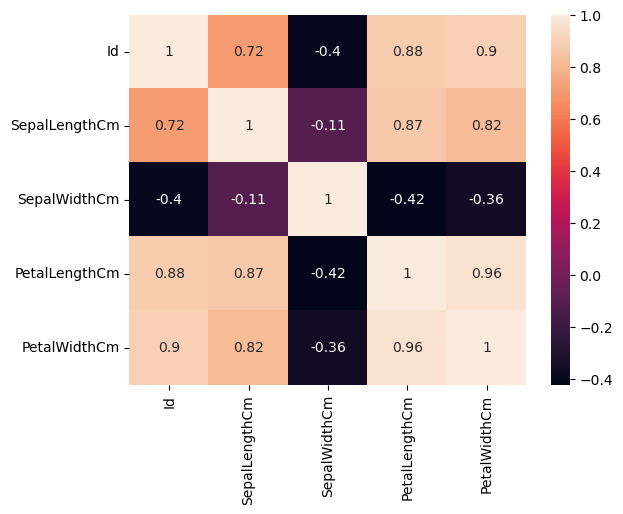

In [17]:
#finding correlation of features 
correl=df.corr()
sns.heatmap(correl,annot=True);
plt.show();

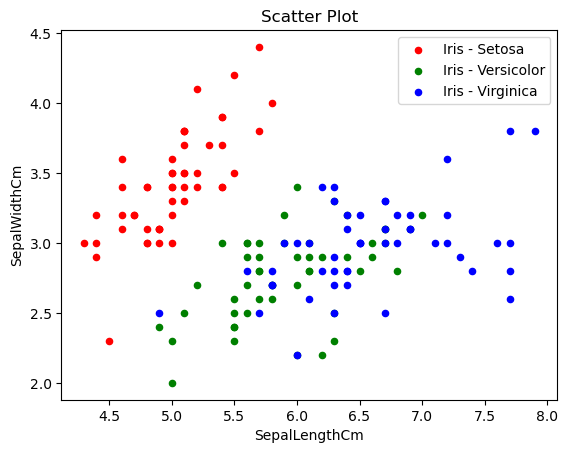

In [18]:
ax = df[df.Species=='Iris-setosa'].plot.scatter(x='SepalLengthCm', y='SepalWidthCm', 
                                                    color='red', label='Iris - Setosa')
df[df.Species=='Iris-versicolor'].plot.scatter(x='SepalLengthCm', y='SepalWidthCm', 
                                                color='green', label='Iris - Versicolor', ax=ax)
df[df.Species=='Iris-virginica'].plot.scatter(x='SepalLengthCm', y='SepalWidthCm', 
                                                color='blue', label='Iris - Virginica', ax=ax)
ax.set_title("Scatter Plot")
plt.show();

In [19]:
encoder = LabelEncoder()
df['Species'] = encoder.fit_transform(df['Species'])


In [20]:
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,2
146,147,6.3,2.5,5.0,1.9,2
147,148,6.5,3.0,5.2,2.0,2
148,149,6.2,3.4,5.4,2.3,2


In [21]:
df= df.drop(['Id'], axis = 1)


In [22]:
data = df.values 

X=data [:, 0:5]
Y= data [: , -1]

print(X.shape)
print(Y.shape)

#train-test split = 3:1 

train_x = X[: 112, ]
train_y = Y[:112, ]

test_x = X[112:150, ]
test_y = Y[112:150, ]

print(train_x.shape)
print(train_y.shape)
print(test_x.shape)
print(test_y.shape)


(150, 5)
(150,)
(112, 5)
(112,)
(38, 5)
(38,)


In [23]:
#KMeans

kmeans = KMeans(n_clusters=3)
kmeans.fit(train_x, train_y)

# training predictions
train_labels= kmeans.predict(train_x)

#testing predictions
test_labels = kmeans.predict(test_x)

In [24]:
#KMeans model accuracy

#training accuracy
print(accuracy_score(train_y, train_labels)*100)
#testing accuracy
print(accuracy_score(test_labels, test_y)*100)


9.821428571428571
94.73684210526315


In [25]:
#classification report for training set 
print(classification_report(train_y, train_labels))

              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00        50
         1.0       0.00      0.00      0.00        50
         2.0       1.00      0.92      0.96        12

    accuracy                           0.10       112
   macro avg       0.33      0.31      0.32       112
weighted avg       0.11      0.10      0.10       112



### K-Means Implementation 

In [34]:
X = np.array([[1,2],[1.5,1.8],[5,8],[8,8],[1,0.6],[9,11]])


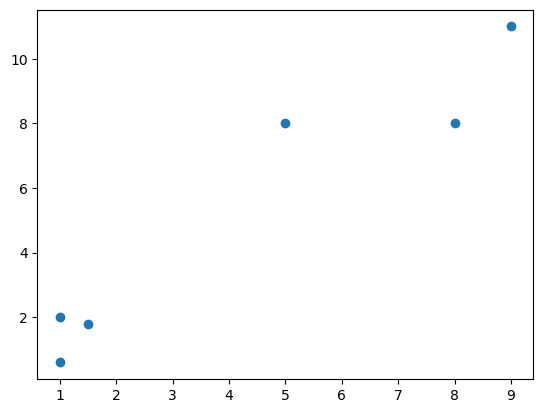

In [35]:
plt.scatter(X[:,0],X[:,1])
plt.show()

In [42]:
def fit(data, k=2,max_iter=3):
    means = []
    #randomly initialize the means
    for i in range(k):
        means.append(data[i])
     
    #print("Means",end=" ")
    #print(means)
    for i in range(max_iter):
        #assign the datapoints to the cluster that they belong to
        #create empty clusters
        #print("Iter: ",i)
        cluster = []
        for j in range(k):
            cluster.append([])
        #print("Cluster",end=" ")
        #print(cluster)
        for point in data:
            #find distance to all the mean values
            distances = [((point-m)**2).sum() for m in means]
            #print("\tDistances: ",end=" ")
            #print(distances)
            #find the min distance 
            minDistance = min(distances)
            #print("\tMinDistance: ",end=" ")
            #print(minDistance)
            #find the mean for which we got the minimum distance --->l
            l = distances.index(minDistance)
            #print("\tL:",end=" ")
            #print(l)
            #add this point to cluster l
            cluster[l].append(point)
           # print("\tCluster: ",end=" ")
            #print(cluster)
            

        #calculate the new mean values
        change = False
        for j in range(k):
            new_mean = np.average(cluster[j],axis=0)
            if np.array_equal(means[j],new_mean):
                change = True
            means[j] = new_mean
        if not change:
            break
    return means

In [49]:
def predict(test_data,means):
    predictions = []
    for point in test_data:
            #find distance to all the mean values
            distances = [((point-m)**2).sum() for m in means]
            #find the min distance 
            minDistance = min(distances)
            #find the mean for which we got the minimum distance --->l
            l = distances.index(minDistance)
            predictions.append(l)
    return predictions

In [50]:
means = fit(X)

In [51]:
predict(X,means)

[0, 0, 1, 1, 0, 1]

### KMeans Class Implementation 

In [63]:
class K_Means:
    
    def __init__(self,k=2,max_iter=100):
        self.k = k
        self.max_iter = max_iter

        
    def fit(self,data):
        self.means = []
        #randomly initialize the means
        for i in range(self.k):
            self.means.append(data[i])
        for i in range(self.max_iter):
           
            cluster = []
            for j in range(self.k):
                cluster.append([])
            for point in data:
                #find distance to all the mean values
                distances = [((point-m)**2).sum() for m in self.means]
                #find the min distance 
                minDistance = min(distances)
                #find the mean for which we got the minimum distance --->l
                l = distances.index(minDistance)
                #add this point to cluster l
                cluster[l].append(point)

            #calculate the new mean values
            change = False
            for j in range(self.k):
                new_mean = np.average(cluster[j],axis=0)
                if np.array_equal(self.means[j],new_mean):
                    change = True
                self.means[j] = new_mean
            if not change:
                break
    
    def predict(self,test_data):
        predictions = []
        for point in test_data:
                #find distance to all the mean values
                distances = [((point-m)**2).sum() for m in self.means]
                #find the min distance 
                minDistance = min(distances)
                #find the mean for which we got the minimum distance --->l
                l = distances.index(minDistance)
                predictions.append(l)
        return predictions

In [68]:
kmeans = K_Means(2,10)

In [69]:
kmeans.fit(X)

In [70]:
kmeans.predict(X)

[0, 0, 1, 1, 0, 1]